# MODEL FOR STUDENT  PERFORMANCE DATA SETS

## Importing Dataframe and Visualization Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Importing Machine Learning Models

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings


## Importing Data Set 

In [7]:
df = pd.read_csv("study_performance (1).csv")

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Spliting Data into independent and dependent variables X,y


In [9]:
X=df.drop('math_score',axis=1)

In [10]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [11]:
y=df['math_score']

In [12]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [13]:
nm_ft = X.select_dtypes(exclude="object").columns
cat_ft = X.select_dtypes(include="object").columns


In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_ft),
         ("StandardScaler", numeric_transformer, nm_ft),        
    ]
)

In [15]:
X = preprocessor.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((700, 19), (300, 19))

In [17]:
mdl = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    
}

In [18]:
def mdl_evl(tr_val, predicted):
    mae = mean_absolute_error(tr_val, predicted)
    mse = mean_squared_error(tr_val, predicted)
    rmse = np.sqrt(mean_squared_error(tr_val, predicted))
    r2_square = r2_score(tr_val, predicted)
    return mae, rmse, r2_square

In [19]:
model_list = []
r2_list =[]

for i in range(len(list(mdl))):
    model = list(mdl.values())[i]
    model.fit(X_train, y_train) 

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = mdl_evl(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = mdl_evl(y_test, y_test_pred)

    
    print(list(mdl.keys())[i])
    model_list.append(list(mdl.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('***********************************')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('-*'*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2484
- Mean Absolute Error: 4.1978
- R2 Score: 0.8751
***********************************
Model performance for Test set
- Root Mean Squared Error: 5.5602
- Mean Absolute Error: 4.4210
- R2 Score: 0.8757
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5106
- Mean Absolute Error: 5.1582
- R2 Score: 0.8078
***********************************
Model performance for Test set
- Root Mean Squared Error: 6.8705
- Mean Absolute Error: 5.3929
- R2 Score: 0.8103
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2487
- Mean Absolute Error: 4.1977
- R2 Score: 0.8751
***********************************
Model performance for Test set
- Root Mean Squared Error: 5.5566
- Mean Absolute Error: 4.4155
- R2 Score: 0.8759
-*-*-*-*-*-*-*-*-*-*

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score'])

,Model Name,R2_Score
0,Linear Regression,0.875745
1,Lasso,0.810281
2,Ridge,0.875907
3,K-Neighbors Regressor,0.772333


## Insights

- Ridge regression and Linear Regression Model gave near identical values 
- any of the above 2 models can be used for predicting the values.


## Linear Regression Model

In [22]:
lin_mdl = LinearRegression(fit_intercept=True)
lin_mdl = lin_mdl.fit(X_train, y_train)
y_pred = lin_mdl.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f" Model accuracy is {round(score,2)}" )

 Model accuracy is 87.57


Text(0, 0.5, 'Predicted')

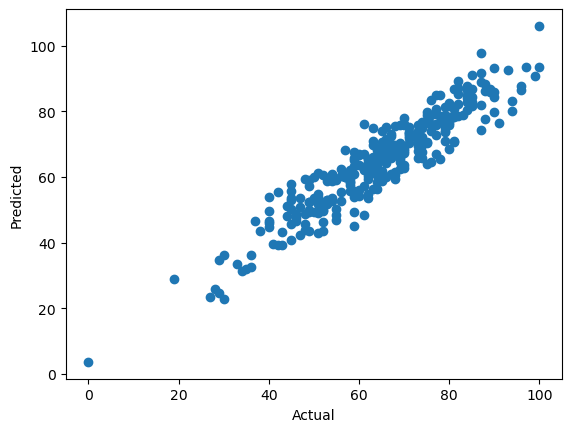

In [42]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')